# Multiple Linear Regression:

## Importing the libraries

In [70]:
import numpy as np # it is used for matric statistic Mathematics
import matplotlib.pyplot as plt #it is used for visualization
import pandas as pd # it is used for data cleaning and data analysis
# modeling imports
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [71]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [73]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [74]:
dataset.describe(include='object') #statistical information on column type string

,State
count,50
unique,3
top,New York
freq,17


In [75]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [76]:
dataset.iloc[5,:] #row 5 all columns

R&D Spend           131876.9
Administration      99814.71
Marketing Spend    362861.36
State               New York
Profit             156991.12
Name: 5, dtype: object

In [77]:
dataset.iloc[0:5,:]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [78]:
features=[["R&D Spend","Administration","Marketing Spend","State"]]

In [79]:
dataset.iloc[:,-1]

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [80]:
#We have to create the x=independent varaible
#We have to create the Y=Dependent varaible

In [81]:
X = dataset.iloc[:, :-1].values # it will take the values of each column except the last column
y = dataset.iloc[:, -1].values # it will take the values of only 

In [82]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [83]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [85]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [87]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [88]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
regressor.coef_

array([ 8.66383692e+01, -8.72645791e+02,  7.86007422e+02,  7.73467193e-01,
        3.28845975e-02,  3.66100259e-02])

In [90]:

#predict the test
predcited_value=regressor.predict(X_test)


In [91]:
predcited_value

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230166,  67851.69209676,  98791.73374686,
       113969.43533013, 167921.06569551])

In [92]:
# calculate residuals
residuals = y_test - predcited_value
residuals

array([   267.17840204,  11677.12239184,  13674.21154826,   5822.73148742,
        12512.90778945, -11152.93230166,  13377.36790324,  -1308.17374686,
        -3617.18533013,  -1733.12569551])

In [93]:
new_df=pd.DataFrame(columns=["Actual Value","Predicted","residual"])

In [94]:

new_df['Actual Value']=y_test
new_df['Predicted']=predcited_value
new_df['residual']=new_df['Actual Value']-new_df['Predicted']

In [95]:
new_df

,Actual Value,Predicted,residual
0,103282.38,103015.201598,267.178402
1,144259.40,132582.277608,11677.122392
2,146121.95,132447.738452,13674.211548
3,77798.83,71976.098513,5822.731487
4,191050.39,178537.482211,12512.907789
5,105008.31,116161.242302,-11152.932302
6,81229.06,67851.692097,13377.367903
7,97483.56,98791.733747,-1308.173747
8,110352.25,113969.435330,-3617.185330
9,166187.94,167921.065696,-1733.125696


In [96]:
# mean of residuals
newdf['residual'].mean()

3952.0102448099483

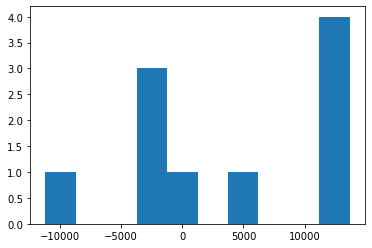

In [97]:
plt.hist(residuals);# check Independence of residuals 

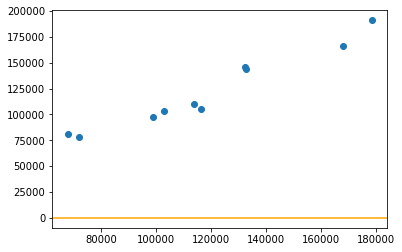

In [98]:
# check residuals are normally distributed
plt.scatter(predcited_value, y_test)
plt.axhline(0, color='orange');

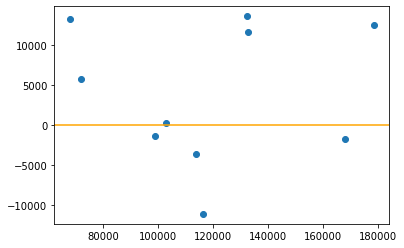

In [99]:
# check Equality of variance
plt.scatter(predcited_value, residuals)
plt.axhline(0, color='orange');

In [100]:
# Via sklearn.metrics
metrics.mean_absolute_error(y_test, predcited_value)

7514.2936596413765

In [101]:
metrics.mean_squared_error(y_test, predcited_value)

83502864.03259295

In [102]:
# RMSE
# The square root method from NumPy
np.sqrt(metrics.mean_squared_error(y_test, predcited_value))

9137.990152795797

In [103]:
# R2 from sklearn
metrics.r2_score(y_test, predcited_value)

0.9347068473282303

94% of the variance/variablity in our y - profit - is explained by the features(R&D Spend,Administration,Marketing Spend,State)